# Fimo output analysis



Initially this notebook was used to calculate the distribution of qvalues for the "motif_alignments_dmmpmm" gff file. It was expanded to also calculate pvalue distributions, and then to perform a rank analysis of pvalues for each of the fimo output files. After reevaluating our next steps, a table was created with the needed data for each of the 5 motif databases. 

In [1]:
import re
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
#Load ipycache extension
%reload_ext ipycache
from ipycache import CacheMagics
CacheMagics.cachedir = '/Users/bergeric/cachedir'

In [2]:
TFtable = []
hits_list = []
with open('../../data/hitcount.txt') as g: 
    for line in g:
        if not line.strip().startswith('1 ##gff-version'):
            hits = int(line.split()[0])
            hits_list.append(hits)
            TF = line.split()[1]
            if hits > 100:
                TFtable.append((TF))

hitdf = pd.DataFrame(TFtable, columns=['TF'])

In [3]:
table = []
with open('../../data/motif_alignments_dmmpmm2009_dm6.gff') as f:
    for line in f: 
        if not line.startswith('##'):
            broken = line.split('\t')
            pattern = broken[8].split(';')[3]
            pval = float(broken[8].split(';')[2][7:])
            qval = float(pattern[7:].strip())
            TF = broken[8].split(';')[0][5:]
            gene = broken[0]
            stuff = (TF, gene, qval, pval)
            table.append(stuff)

In [4]:
df= pd.DataFrame(table, columns=['TF', 'gene', 'qvalue', 'pvalue'])
df.head()

,TF,gene,qvalue,pvalue
0,bcd,FBgn0031208,1.0,0.000033
1,bcd,FBgn0031208,1.0,0.000197
2,bcd,FBgn0002121,1.0,0.000077
3,bcd,FBgn0002121,1.0,0.000234
4,bcd,FBgn0002121,1.0,0.000492


In [5]:
grp1 = df.groupby('TF')
grp1.describe()

pvalue                                                            \
           count      mean           std           min       25%       50%   
TF                                                                           
Deaf1    91200.0  0.000194  1.100581e-04  2.230000e-06  0.000097  0.000198   
Dfd      46418.0  0.000060  2.709213e-05  3.230000e-05  0.000032  0.000059   
Dref     50440.0  0.000098  5.993967e-05  1.350000e-06  0.000044  0.000094   
Eip74EF  47294.0  0.000096  4.973941e-05  1.470000e-05  0.000063  0.000104   
Kr       90542.0  0.000208  1.255684e-04  1.350000e-06  0.000101  0.000204   
Mad      95051.0  0.000148  8.568296e-05  9.310000e-08  0.000076  0.000147   
Med      99330.0  0.000109  6.919940e-05  2.270000e-07  0.000049  0.000105   
Trl      99997.0  0.000069  5.420604e-05  1.880000e-08  0.000017  0.000060   
bcd      87925.0  0.000290  1.493215e-04  1.470000e-05  0.000167  0.000303   
br-Z1    33402.0  0.000045  2.295569e-05  2.650000e-05  0.000027  0.000027   
br-Z2    43914.0  0.000139  4.780505e-05  9.660000e-05  0.000097  0.000097   
br-Z3    72541.0  0.000079  3.459087e-05  1.480000e-06  0.000055  0.000078   
br-Z4    62412.0  0.000111  3.348521e-05  5.300000e-05  0.000118  0.000118   
brk      78103.0  0.000140  7.705718e-05  2.960000e-05  0.000066  0.000146   
byn      80670.0  0.000163  9.573234e-05  1.210000e-05  0.000092  0.000142   
cad      51928.0  0.000060  3.269335e-05  7.280000e-06  0.000039  0.000059   
dl       93844.0  0.000107  6.556415e-05  1.680000e-07  0.000052  0.000101   
en       47321.0  0.000065  2.499881e-05  2.180000e-05  0.000048  0.000075   
eve      93966.0  0.000165  9.409968e-05  4.350000e-05  0.000097  0.000132   
ftz      82421.0  0.000120  7.204006e-05  2.180000e-05  0.000048  0.000106   
grh      56134.0  0.000237  1.084212e-19  2.370000e-04  0.000237  0.000237   
gt       82507.0  0.000219  8.920257e-05  9.660000e-05  0.000097  0.000272   
hb       63824.0  0.000035  1.915080e-05  7.280000e-06  0.000022  0.000029   
kni      56085.0  0.000067  3.856016e-05  2.290000e-08  0.000034  0.000067   
ovo      64088.0  0.000419  1.394761e-04  2.370000e-04  0.000237  0.000526   
prd      92679.0  0.000240  1.291927e-04  1.790000e-05  0.000141  0.000249   
sd       53503.0  0.000049  3.118861e-05  8.340000e-08  0.000020  0.000047   
slbo     54201.0  0.000069  4.181253e-05  9.090000e-07  0.000032  0.000063   
sna      87999.0  0.000179  1.115768e-04  2.720000e-06  0.000077  0.000170   
tin      64412.0  0.000135  5.795470e-05  6.510000e-05  0.000065  0.000144   
tll      94294.0  0.000141  7.821385e-05  2.180000e-05  0.000066  0.000168   
ttk      49970.0  0.000172  6.368468e-05  4.390000e-05  0.000204  0.000204   
twi      93186.0  0.000191  1.084660e-04  1.790000e-05  0.000087  0.000209   
vvl      38083.0  0.000352  5.421082e-20  3.520000e-04  0.000352  0.000352   
z        61658.0  0.000237  1.084211e-19  2.370000e-04  0.000237  0.000237   

                              qvalue                                         \
              75%       max    count      mean           std     min    25%   
TF                                                                            
Deaf1    0.000290  0.000387  91200.0  0.968581  4.096314e-02  0.7870  0.980   
Dfd      0.000085  0.000107  46418.0  0.457459  4.850480e-02  0.4080  0.408   
Dref     0.000158  0.000199  50440.0  0.812940  1.229978e-01  0.3210  0.794   
Eip74EF  0.000144  0.000173  47294.0  0.828811  1.358638e-02  0.7910  0.832   
Kr       0.000317  0.000428  90542.0  0.973808  5.993782e-02  0.6660  0.995   
Mad      0.000219  0.000297  95051.0  0.724356  1.122301e-02  0.6930  0.716   
Med      0.000169  0.000236  99330.0  0.480360  7.607670e-02  0.2610  0.464   
Trl      0.000115  0.000172  99997.0  0.256381  1.217662e-01  0.0115  0.160   
bcd      0.000411  0.000510  87925.0  1.000000  0.000000e+00  1.0000  1.000   
br-Z1    0.000075  0.000097  33402.0  0.431065  1.031724e-01  0.3480  0.348   
br-Z2    0.000193 

In [6]:
indexTF = df.set_index(['TF'])
df2 = df[["TF","qvalue","pvalue"]]
#sub = df2.iloc[:5000,:]
groups = df2.groupby(['TF'])

###### zip(df2, axes.flatten())


/Users/bergeric/miniconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/Users/bergeric/miniconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


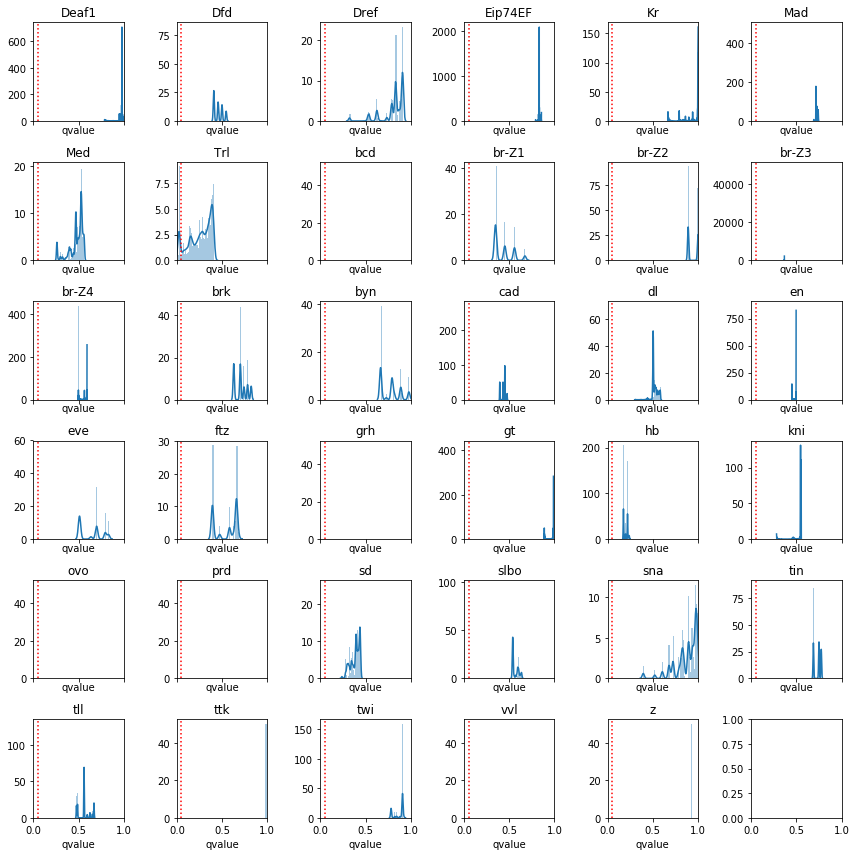

In [7]:
x= groups['qvalue']
fig, axes = plt.subplots(6,6, figsize=(12,12), sharex=True)
#axr = axes.ravel()
#zip(groups, axes.flatten())
for ax, x in zip(axes.flat, x):
    sb.distplot(x[1], ax=ax)
    ax.set_title(x[0])
    ax.axvline(0.05, color='r', ls=':')
    #axes.flat[-1].set_visible(False)
ax.set_xlim(0,1)
plt.tight_layout()

/Users/bergeric/miniconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/Users/bergeric/miniconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


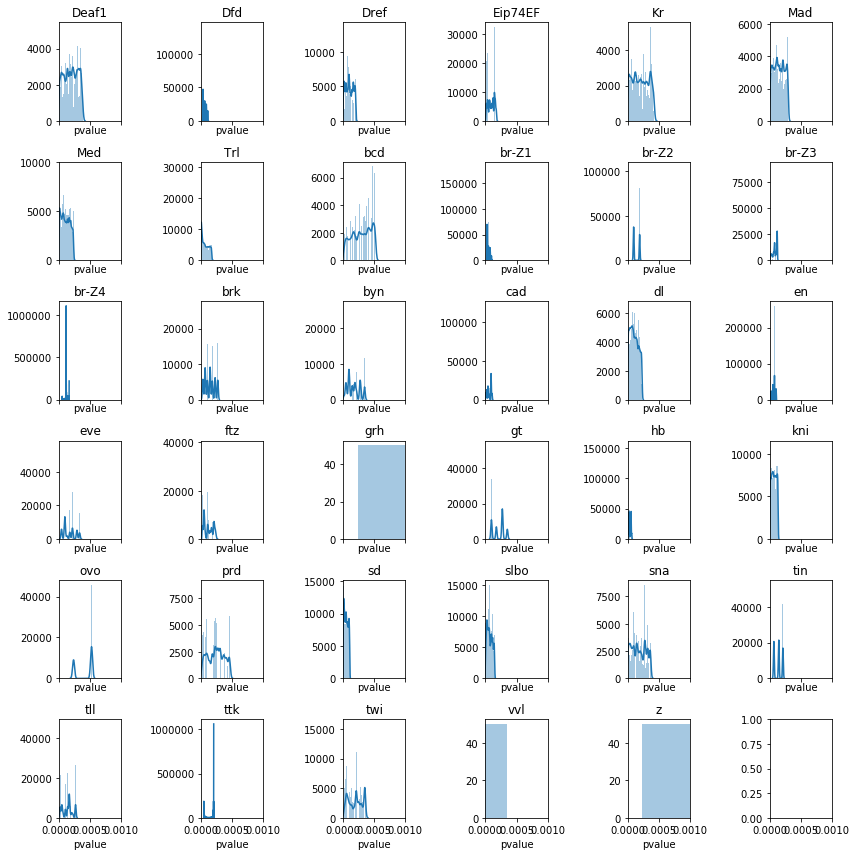

In [9]:
x= groups['pvalue']

fig, axes = plt.subplots(6,6, figsize=(12,12), sharex=True)
#axr = axes.ravel()

#zip(groups, axes.flatten())
for ax, x in zip(axes.flat, x):
    sb.distplot(x[1], ax=ax)
    ax.set_title(x[0])
    ax.axvline(0.05, color='r', ls=':')
    #axes.flat[-1].set_visible(False)
ax.set_xlim(0,0.001)
plt.tight_layout()

# Create big concatenated table:
make tables for each database, then concat into one! 


### dmmpmm:

In [66]:
table = []
with open('../../data/motif_alignments_dmmpmm2009_dm6.gff') as f:
    for line in f: 
        if not line.startswith('##'):
            broken = line.split('\t')
            pattern = broken[8].split(';')[3]
            pval = float(broken[8].split(';')[2][7:])
            qval = float(pattern[7:].strip())
            TF = broken[8].split(';')[0][5:]
            gene = broken[0]
            start = broken[3]
            stop = broken[4]
            stuff = (TF, TF, gene, start, stop, qval, pval)
            table.append(stuff)
            
dmm_df= pd.DataFrame(table, columns=['motif_id', 'motif_symbol','target_gene','start','stop','qvalue', 'pvalue'])

In [67]:
#add column for motif_FBgn
symbolmap = pd.read_table('/data/LCDB/lcdb-references/dmel/r6-11/gtf/dmel_r6-11.SYMBOL.csv', sep=',') 
dmm1 = dmm_df.merge(symbolmap, left_on='motif_id', right_on='SYMBOL', how='left')
dmm1 = dmm1.rename(columns={'ENSEMBL': 'motif_FBgn'})
dmmtrim = dmm1[['motif_id','motif_FBgn','motif_symbol','target_gene','start','stop','pvalue']]

In [68]:
%%cache dmm.pkl dmm
#collapse on start/stop and get min p value, # hits 
dmmtrim['hits'] = 0
dmmtrim2 = dmmtrim.groupby(['motif_id','motif_FBgn','motif_symbol','target_gene'])
dmmagg = dmmtrim2.agg({'pvalue': ['min'], 'hits': 'count'})
dmmagg.columns = ['#hits','min_pval'] 
dmm = dmmagg.reset_index()
dmm['source'] = 'dmmpmm'

[Saved variables 'dmm' to file '/Users/bergeric/cachedir/dmm.pkl'.]


/Users/bergeric/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [69]:
dmm.head()

,motif_id,motif_FBgn,motif_symbol,target_gene,#hits,min_pval,source
0,Deaf1,FBgn0013799,Deaf1,FBgn0000003,2,0.000323,dmmpmm
1,Deaf1,FBgn0013799,Deaf1,FBgn0000008,26,0.000010,dmmpmm
2,Deaf1,FBgn0013799,Deaf1,FBgn0000014,21,0.000026,dmmpmm
3,Deaf1,FBgn0013799,Deaf1,FBgn0000015,42,0.000024,dmmpmm
4,Deaf1,FBgn0013799,Deaf1,FBgn0000017,25,0.000033,dmmpmm


### flyReg:

In [70]:
table = []
with open('../../data/fimo/motif_alignments_flyReg_dm6.gff') as f:
    for line in f: 
        if not line.startswith('##'):
            broken = line.split('\t')
            pattern = broken[8].split(';')[3]
            pval = float(broken[8].split(';')[2][7:])
            qval = float(pattern[7:].strip())
            TF = broken[8].split(';')[0][5:]
            gene = broken[0]
            start = broken[3]
            stop = broken[4]
            stuff = (TF, TF, gene, start, stop, qval, pval)
            table.append(stuff)
            
flyReg_df= pd.DataFrame(table, columns=['motif_id', 'motif_symbol','target_gene','start','stop','qvalue', 'pvalue'])

In [71]:
#add column for motif_FBgn
symbolmap = pd.read_table('/data/LCDB/lcdb-references/dmel/r6-11/gtf/dmel_r6-11.SYMBOL.csv', sep=',') 
reg1 = flyReg_df.merge(symbolmap, left_on='motif_id', right_on='SYMBOL', how='left')
reg1 = reg1.rename(columns={'ENSEMBL': 'motif_FBgn'})
regtrim = reg1[['motif_id','motif_FBgn','motif_symbol','target_gene','start','stop','pvalue']]

In [55]:
%%cache reg.pkl reg
#collapse on start/stop and get min p value, # hits 
regtrim['hits'] = 0
regtrim2 = regtrim.groupby(['motif_id','motif_FBgn','motif_symbol','target_gene'])
regagg = regtrim2.agg({'pvalue': ['min'], 'hits': 'count'})
regagg.columns = ['#hits','min_pval'] 
reg = regagg.reset_index()
reg['source'] = 'flyReg'

[Saved variables 'reg' to file '/Users/bergeric/cachedir/reg.pkl'.]


/Users/bergeric/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [56]:
reg.head()

,motif_id,motif_FBgn,motif_symbol,target_gene,#hits,min_pval,source
0,Abd-B,FBgn0000015,Abd-B,FBgn0000008,28,0.000027,flyReg
1,Abd-B,FBgn0000015,Abd-B,FBgn0000014,20,0.000027,flyReg
2,Abd-B,FBgn0000015,Abd-B,FBgn0000015,68,0.000027,flyReg
3,Abd-B,FBgn0000015,Abd-B,FBgn0000017,24,0.000027,flyReg
4,Abd-B,FBgn0000015,Abd-B,FBgn0000018,3,0.000171,flyReg


### using idmmpmm:

In [72]:
table = []
with open('../../data/fimo/motif_alignments_idmmpmm2009_dm6.gff') as f:
    for line in f: 
        if not line.startswith('##'):
            broken = line.split('\t')
            pattern = broken[8].split(';')[3]
            pval = float(broken[8].split(';')[2][7:])
            qval = float(pattern[7:].strip())
            TF = broken[8].split(';')[0][5:]
            gene = broken[0]
            start = broken[3]
            stop = broken[4]
            stuff = (TF, TF, gene, start, stop, qval, pval)
            table.append(stuff)
            
idm_df= pd.DataFrame(table, columns=['motif_id', 'motif_symbol','target_gene','start','stop','qvalue', 'pvalue'])

In [73]:
#add column for motif_FBgn
symbolmap = pd.read_table('/data/LCDB/lcdb-references/dmel/r6-11/gtf/dmel_r6-11.SYMBOL.csv', sep=',') 
idm1 = idm_df.merge(symbolmap, left_on='motif_id', right_on='SYMBOL', how='left')
idm1 = idm1.rename(columns={'ENSEMBL': 'motif_FBgn'})
idmtrim = idm1[['motif_id','motif_FBgn','motif_symbol','target_gene','start','stop','pvalue']]

In [74]:
#collapse on start/stop and get min p value, # hits 
idmtrim['hits'] = 0
idmtrim2 = idmtrim.groupby(['motif_id','motif_FBgn','motif_symbol','target_gene'])
idmagg = idmtrim2.agg({'pvalue': ['min'], 'hits': 'count'})

/Users/bergeric/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [57]:
%%cache idm.pkl idm
idmagg.columns = ['#hits','min_pval'] 
idm = idmagg.reset_index()
idm['source'] = 'idmmpmm'

[Saved variables 'idm' to file '/Users/bergeric/cachedir/idm.pkl'.]


### using flyFactor: 

In [2]:
table = []
with open('../../data/fimo/motif_alignments_flyFactor_dm6.gff') as f:
    for line in f: 
        if not line.startswith('##'):
            broken = line.split('\t')
            pattern = broken[8].split(';')[3]
            pval = float(broken[8].split(';')[2][7:])
            qval = float(pattern[7:].strip())
            TF = broken[8].split(';')[0][5:]
            gene = broken[0]
            start = broken[3]
            stop = broken[4]
            stuff = (TF, gene, start, stop, qval, pval)
            table.append(stuff)
            
flyF_df= pd.DataFrame(table, columns=['motif_FBgn', 'target_gene','start','stop','qvalue', 'pvalue'])

NameError: name 'pd' is not defined

In [18]:
#add column for motif_symbol
symbolmap = pd.read_table('/data/LCDB/lcdb-references/dmel/r6-11/gtf/dmel_r6-11.SYMBOL.csv', sep=',') 
flyf1 = flyF_df.merge(symbolmap, left_on='motif_FBgn', right_on='ENSEMBL', how='left')
flyf1 = flyf1.rename(columns={'SYMBOL': 'motif_symbol'})
factortrim = flyf1[['motif_symbol','motif_FBgn','motif_symbol','target_gene','start','stop','pvalue']]
factortrim.columns = ['motif_id','motif_FBgn','motif_symbol','target_gene','start','stop','pvalue']

,motif_id,motif_FBgn,motif_symbol,target_gene,start,stop,pvalue
0,abd-A,FBgn0000014,abd-A,FBgn0031208,15,21,0.000118
1,abd-A,FBgn0000014,abd-A,FBgn0002121,942,948,0.000118
2,abd-A,FBgn0000014,abd-A,FBgn0002121,1468,1474,0.000118
3,abd-A,FBgn0000014,abd-A,FBgn0002121,3259,3265,0.000118
4,abd-A,FBgn0000014,abd-A,FBgn0002121,3526,3532,0.000118


In [37]:
#collapse on start/stop and get min p value, # hits 
factortrim['hits'] = 0
factortrim2 = factortrim.groupby(['motif_id','motif_FBgn','motif_symbol','target_gene'])
factoragg = factortrim2.agg({'pvalue': ['min'], 'hits': 'count'})

hits    pvalue
                                              count       min
motif_id motif_FBgn  motif_symbol target_gene                
Abd-B    FBgn0000015 Abd-B        FBgn0000008    17  0.000006
                                  FBgn0000014    25  0.000006
                                  FBgn0000015    56  0.000006
                                  FBgn0000017    15  0.000013
                                  FBgn0000018     1  0.000068

In [58]:
%%cache factor.pkl factor
factoragg.columns = ['#hits','min_pval'] 
factor = factoragg.reset_index()
factor['source']='flyFactor'

[Saved variables 'factor' to file '/Users/bergeric/cachedir/factor.pkl'.]


In [59]:
factor.head()

,motif_id,motif_FBgn,motif_symbol,target_gene,#hits,min_pval,source
0,Abd-B,FBgn0000015,Abd-B,FBgn0000008,17,0.000006,flyFactor
1,Abd-B,FBgn0000015,Abd-B,FBgn0000014,25,0.000006,flyFactor
2,Abd-B,FBgn0000015,Abd-B,FBgn0000015,56,0.000006,flyFactor
3,Abd-B,FBgn0000015,Abd-B,FBgn0000017,15,0.000013,flyFactor
4,Abd-B,FBgn0000015,Abd-B,FBgn0000018,1,0.000068,flyFactor


### using onTheFly:

In [21]:
table = []
with open('../../data/fimo/motif_alignments_onTheFly_dm6.gff') as f:
    for line in f: 
        if not line.startswith('##'):
            broken = line.split('\t')
            pattern = broken[8].split(';')[3]
            pval = float(broken[8].split(';')[2][7:])
            qval = float(pattern[7:].strip())
            TF = broken[8].split(';')[0][5:]
            gene = broken[0]
            start = broken[3]
            stop = broken[4]
            stuff = (TF, gene, start, stop, qval, pval)
            table.append(stuff)
            
otf_df= pd.DataFrame(table, columns=['motif_id', 'target_gene','start','stop', 'qvalue', 'pvalue'])

,motif_id,target_gene,start,stop,qvalue,pvalue
0,OTF0001.1,FBgn0031208,1262,1268,1.0,0.000269
1,OTF0001.1,FBgn0031208,1557,1563,1.0,0.000269
2,OTF0001.1,FBgn0031208,2218,2224,1.0,0.000269
3,OTF0001.1,FBgn0002121,4896,4902,1.0,0.000065
4,OTF0001.1,FBgn0002121,4203,4209,1.0,0.000119


In [22]:
#add column for motif_FBGN
otfmap = pd.read_table('../../output/onTheFlyMap.tsv')
y = otfmap[['name', 'FBgn']]
update = otf_df.merge(y, left_on='motif_id',right_on='name', how='left')

,motif_id,target_gene,start,stop,qvalue,pvalue,name,FBgn
0,OTF0001.1,FBgn0031208,1262,1268,1.0,0.000269,OTF0001.1,FBgn0003651
1,OTF0001.1,FBgn0031208,1557,1563,1.0,0.000269,OTF0001.1,FBgn0003651
2,OTF0001.1,FBgn0031208,2218,2224,1.0,0.000269,OTF0001.1,FBgn0003651
3,OTF0001.1,FBgn0002121,4896,4902,1.0,0.000065,OTF0001.1,FBgn0003651
4,OTF0001.1,FBgn0002121,4203,4209,1.0,0.000119,OTF0001.1,FBgn0003651


In [23]:
update = update.rename(columns={'FBgn': 'motif_FBgn'})
usethis = update[['motif_id','motif_FBgn','target_gene','start','stop','pvalue']]
#add column for motif_symbol
symbolmap = pd.read_table('/data/LCDB/lcdb-references/dmel/r6-11/gtf/dmel_r6-11.SYMBOL.csv', sep=',') 
update2 = usethis.merge(symbolmap, left_on='motif_FBgn', right_on='ENSEMBL', how='left')
update2 = update2.rename(columns={'SYMBOL': 'motif_symbol'})
trim = update2[['motif_id','motif_FBgn','motif_symbol','target_gene','start','stop','pvalue']]

,motif_id,motif_FBgn,motif_symbol,target_gene,start,stop,pvalue
0,OTF0001.1,FBgn0003651,svp,FBgn0031208,1262,1268,0.000269
1,OTF0001.1,FBgn0003651,svp,FBgn0031208,1557,1563,0.000269
2,OTF0001.1,FBgn0003651,svp,FBgn0031208,2218,2224,0.000269
3,OTF0001.1,FBgn0003651,svp,FBgn0002121,4896,4902,0.000065
4,OTF0001.1,FBgn0003651,svp,FBgn0002121,4203,4209,0.000119


In [24]:
#collapse on start/stop and get min p value, # hits
#aggregate to have minimum of p value and count of count column 
trim['hits'] = 0
trim2 = trim.groupby(['motif_id','motif_FBgn','motif_symbol','target_gene'])
aggdf = trim2.agg({'pvalue': ['min'], 'hits': 'count'})

In [60]:
%%cache otf.pkl otf
aggdf.columns = ['#hits','min_pval'] 
otf = aggdf.reset_index()
otf['source']='onTheFly'

[Saved variables 'otf' to file '/Users/bergeric/cachedir/otf.pkl'.]


In [61]:
otf.head()

,motif_id,motif_FBgn,motif_symbol,target_gene,#hits,min_pval,source
0,OTF0001.1,FBgn0003651,svp,FBgn0000003,1,0.000119,onTheFly
1,OTF0001.1,FBgn0003651,svp,FBgn0000008,19,0.000065,onTheFly
2,OTF0001.1,FBgn0003651,svp,FBgn0000014,4,0.000065,onTheFly
3,OTF0001.1,FBgn0003651,svp,FBgn0000015,21,0.000065,onTheFly
4,OTF0001.1,FBgn0003651,svp,FBgn0000017,13,0.000065,onTheFly


### concatenate tables to make one big table and write out: 

In [63]:
bigconcat = pd.concat([dmm, reg, idm, factor, otf],ignore_index=True)

In [65]:
bigconcat.to_csv('../../output/concat.txt', sep='\t')

# P-value percentile rank analysis: 
code that I had been using for the rank analysis and want to save just in case! 

In [ ]:
#from dmmpmm: 
df['pval_rankpct'] = df[["pvalue"]].rank(pct=True)
rankframe = df[df.pvalue < df.pvalue.quantile(.25)].copy()
len(rankframe.TF.unique())
rankframe['flag_dmmpmm'] = True
dmmpmm = rankframe[['TF', 'gene', 'flag_dmmpmm']].drop_duplicates()
dmmpmm.head()

In [ ]:
#from flyReg: 
flyReg_df['pval_rankpct'] = flyReg_df[["pvalue"]].rank(pct=True)
rankframe = flyReg_df[flyReg_df.pvalue < flyReg_df.pvalue.quantile(.25)].copy()
len(rankframe.TF.unique())
rankframe['flag_flyReg'] = True
flyReg = rankframe[['TF', 'gene', 'flag_flyReg']].drop_duplicates()

flyReg.head()

In [ ]:
#from idmmpmm: 
idm_df['pval_rankpct'] = idm_df[["pvalue"]].rank(pct=True)
rankframe = idm_df[idm_df.pvalue < idm_df.pvalue.quantile(.25)].copy()
len(rankframe.TF.unique())
rankframe['flag_idmmpmm'] = True
idmmpmm = rankframe[['TF', 'gene', 'flag_idmmpmm']].drop_duplicates()

idmmpmm.head()


In [ ]:
#from flyFactor: 
flyF_df['pval_rankpct'] = flyF_df[["pvalue"]].rank(pct=True)
rankframe = flyF_df[flyF_df.pvalue < flyF_df.pvalue.quantile(.25)].copy()
len(rankframe.TF.unique())
rankframe['flag_flyFactor'] = True
flyFactor = rankframe[['TF', 'gene', 'flag_flyFactor']].drop_duplicates()

flyFactor.head()

In [ ]:
otf2['pval_rankpct'] = otf2[["pvalue"]].rank(pct=True)
rankframe = otf2[otf2.pvalue < otf2.pvalue.quantile(.25)].copy()
len(rankframe.TF.unique())
rankframe['flag_OTF'] = True
onTheFly = rankframe[['TF', 'gene', 'flag_OTF']].drop_duplicates()
onTheFly.head()